(assignment_4)=

# Assignment 4: Basin-scale waves and overturning circulation

For this assignment you will do quantiative analysis of basin-scale waves (see {ref}`assignment_3`), and a qualitative analysis of overturning circulations.

## Q1.1  Super-inertial Poincarre waves.

### Q1.1.a Determine the wavelength and frequency of waves


From the `poincarre12.py` simulation, estimate the wavelength and frequency of the waves produced.  

Estimate the phase speed and compare to theory.  Estimate the group speed and compare to theory.  Recall that $f=10^{-4} \ \mathrm{rad\,s^{-1}}$, and that the high-frequency wave speed is given by $\sqrt{\frac{g'h_1 h_2}{h_1 + h_2}}$, where $h_1 = 60 \ \mathrm{m}$, $h_2 = 140\ \mathrm{m}$, and $g' = 0.2 g / 1000 = 1.96\times10^{-3}\ \mathrm{m\,s^{-2}}$



In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def subplots_shared(n, m, sharex=True, sharey=True, layout='constrained', figsize=None):
    return plt.subplots(n, m, sharex=sharex, sharey=sharey, layout=layout, figsize=figsize)

def pcolormesh_sym(x, y, z, vbound, ax=None, cmap='RdBu_r'):
    if ax is None:
        ax = plt.gca()
    return ax.pcolormesh(x, y, z, vmin=-vbound, vmax=vbound, cmap=cmap, rasterized=True)

def tohours(Time):
    return Time.values.astype('float') / 1e9 /3600


In [ ]:
# use the matplotlib widget
%matplotlib widget

Chigh 1.1592641456436925
phase speed 1.596479878032792 m/s
phase speed 5.747327560918051 km/h


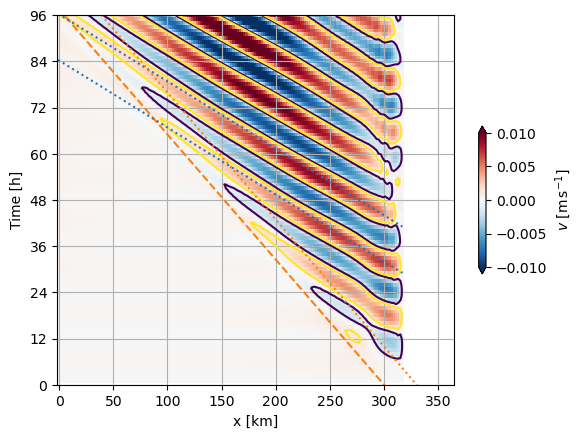

In [2]:
fig, ax = plt.subplots()
with xr.open_dataset('Poincarre12.snapshot.nc') as ds:
    ds = ds.sel(yt=100, yu=100, method='nearest')
    time = tohours(ds.Time)
    pc = ax.pcolormesh(ds.xt, time, ds.v.isel(zt=-2) * (ds.xt-320) / 25,
                      vmin=-0.01, vmax=0.01, cmap='RdBu_r')
    ax.contour(ds.xt, time, ds.v.isel(zt=-2) * (ds.xt-320) / 25, levels=[-1e-3, 1e-3])
    fig.colorbar(pc, ax = ax, shrink=0.4, extend='both', label=r'$v \ \mathrm{[m\,s^{-1}]}$')
    ax.set_yticks(np.arange(0, 100, 12))
    ax.set_xlabel('x [km]')
    ax.set_ylabel('Time [h]')
    ax.grid('on')
    
    T = 12  # h
    lam = 242-165  # km
    #ax.plot(ds.xt, (300 - ds.xt) * 12 / lam + 32, ls='--', color='C0')
    #ax.plot(ds.xt, (300 - ds.xt) * 12 / lam + 32 + 12*3, ls='--', color='C0')
    ax.set_ylim([0, 96])
    
    # group speed:
    dx = 221 - 141
    dt = 28 - 54
    
    cg = dx/dt
    ax.plot(ds.xt , -(300-ds.xt) / cg , ls='--', color='C1')
    
    gp = 20 * 0.167 * 9.81 / 1024
    h1 = 60
    h2 = 140
    ch = np.sqrt(gp * h1 * h2 / (h1 + h2))
    print('Chigh', ch)
    om = 2 * np.pi / 12 / 3600
    f = 1e-4
    k = np.sqrt((om**2 - f**2) / ch**2)
    cp = om / k  # m/s
    print('phase speed', cp, 'm/s')
    cp = cp / 1000 * 3600  # km / h
    print('phase speed', cp, 'km/h')
    
    ax.plot(ds.xt, (300 - ds.xt) / cp + 32, ls=':', color='C0')
    ax.plot(ds.xt, (300 - ds.xt) / cp + 32 + 12, ls=':', color='C0')
    
    cg = ch**2 / om * k
    cg = cg * 3.6   # km/h
    ax.plot(ds.xt +30 , (300-ds.xt) / cg, ls=':', color='C1')

    
    

The phase speed is quite easy to pick off as the slope of the phase lines.  I found it easiest to contour a very small amplitude to pick off the propagation of energy across the basin, or the group speed.  Note that the group speed is substantially less than the phase speed. 

Theoretically, 

$$ \omega = \sqrt{f^2 + c_H^2 k^2} $$ 

$c_H = 1.15 \ \mathrm{m\,s^{-1}}$.  We know that $\omega = 2 \pi / 12 h = 1.45\times10^{-4}\ \mathrm{rad\,s^{-1}}$ so we can invert for $k$ and then get the phase speed as $\omega / k = \lambda / T = 1.74 \ \mathrm{m\,s^{-1}}$ (note that plot above is km/h so convert).  The eyball estimate and the dashed line are in very good agreement.  

The group speed is given by $\frac{\partial \omega}{\partial k} = \frac{c_H^2}{c_p} = 0.921 \ \mathrm{m\,s^{-1}}$.  Note that this groups speed is somewhat faster than what I picked off by eye.  The reason is that the amplitude of the spreading waves drops off with distance from the paddle because of cylindrical spreading.  In the above plots I tried to correct for this by multiplying the velocity signal by $r/r_0$.  

We can also see by looking at the plots we made last time that the wave signal interferes with itself as Kelvin waves are created when the Poincarre waves hit the southern boundary, and carry energy back to the paddle region.  

### Q1.2a  Kelvin wave

Do as above, but for the Kelvin wave: `Kelvin40.py`.  



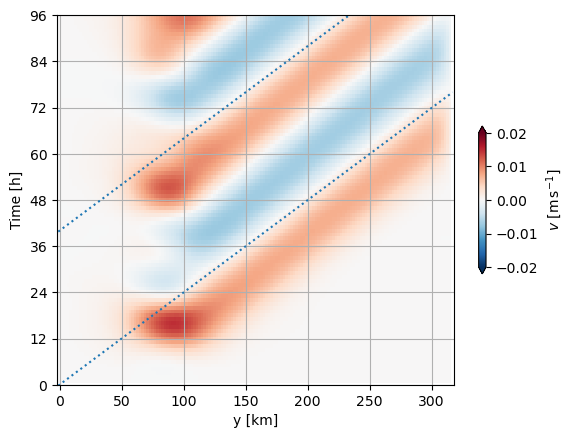

In [3]:
fig, ax = plt.subplots()
with xr.open_dataset('Kelvin40.snapshot.nc') as ds:
    ds = ds.isel(xt=-3, xu=-3)
    time = tohours(ds.Time)
    pc = ax.pcolormesh(ds.yt, time, ds.v.isel(zt=-2),
                      vmin=-0.01*2, vmax=0.01*2, cmap='RdBu_r')
    # ax.contour(ds.xt, time, ds.v.isel(zt=-2), levels=[-1e-4, 1e-4])
    fig.colorbar(pc, ax = ax, shrink=0.4, extend='both', label=r'$v \ \mathrm{[m\,s^{-1}]}$')
    ax.set_yticks(np.arange(0, 100, 12))
    ax.set_xlabel('y [km]')
    ax.set_ylabel('Time [h]')
    ax.grid('on')
    
    T = 12  # h
    ax.set_ylim([0, 96])
    
    ax.plot(ds.yt, (ds.yt) / ch / 3.6, ls=':', color='C0')
    ax.plot(ds.yt, (ds.yt) / ch / 3.6 + 40, ls=':', color='C0')
    


The Kelvin waves very consistenly move at the high-frequency phase speed, and that phase speed is also the group speed. 

### Q1.2b Kelvin wave assumptions:

Check the assumptions of Kelvin wave theory.  How large is the along-sidewall velocity versus cross-sidewall?  
What happens when the wave reaches a corner?  What is the Rossby radius and how does it compare to the observed signals?

11.592641456436924


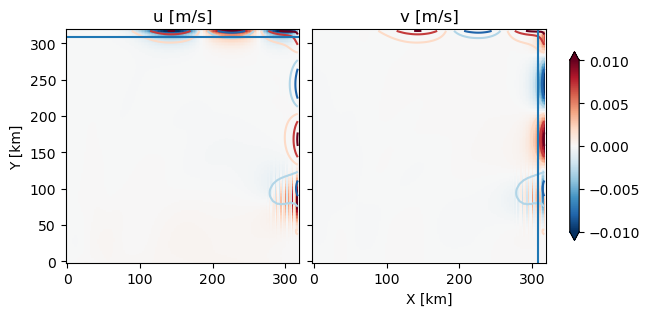

In [4]:
fig, ax = subplots_shared(1, 2)
with xr.open_dataset('Kelvin40.snapshot.nc') as ds:
    ds = ds.isel(Time=110, zt=-2, zw=-2)
    pcolormesh_sym(ds.xu, ds.yt, ds.u, vbound=0.01, ax=ax[0])
    pc = pcolormesh_sym(ds.xt, ds.yu, ds.v, vbound=0.01, ax=ax[1])
    for a in ax:
        a.contour(ds.xt, ds.yt, ds.psi, levels=np.arange(-0.103, 0.1, 0.005), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
    
        a.set_aspect(1)
    fig.colorbar(pc, ax=ax, shrink=0.4, extend='both')
    ax[0].set_ylabel('Y [km]')
    ax[1].set_xlabel('X [km]')
    ax[0].set_title('u [m/s]')
    ax[1].set_title('v [m/s]')
    
    
    Ro = ch / f / 1000
    print(Ro)
    ax[1].axvline(320-Ro)
    ax[0].axhline(320-Ro)
    
    

So the Kelvin wave signal is as expected - most of the velocity is parallel to the coasts, and there is almost no velocity perpendicular.  The velcoity signal falls off in approximately one Rossby radius ($c_H / f = 11.6 \ \mathrm{km}$).  

### Q1.2c geostrophic balance?

Calculate the north-south geostrophic flow and compare to the flow in the Kelvin waves in the upper layer.  Comment on any difference.

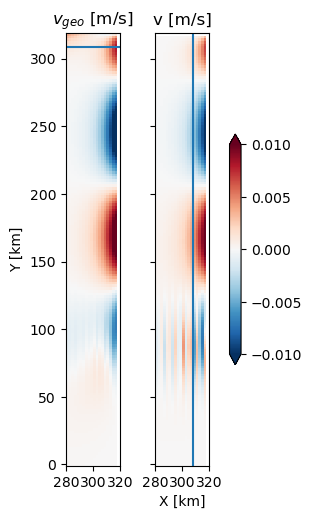

In [5]:
fig, ax = subplots_shared(1, 2, figsize=(3, 6))
with xr.open_dataset('Kelvin40.snapshot.nc') as ds:
    ds = ds.isel(Time=110, zt=-2, zw=-2)
    vgeo = ds.psi.differentiate(coord='xt') / f / 1000
    pc = pcolormesh_sym(ds.xt, ds.yu, vgeo, vbound=0.01, ax=ax[0])
    
    pc = pcolormesh_sym(ds.xt, ds.yu, ds.v, vbound=0.01, ax=ax[1])
    for a in ax:
    
        a.set_aspect(1)
    fig.colorbar(pc, ax=ax, shrink=0.4, extend='both')
    ax[0].set_ylabel('Y [km]')
    ax[1].set_xlabel('X [km]')
    ax[0].set_title('$v_{geo}$ [m/s]')
    ax[1].set_title('v [m/s]')
    ax[0].set_xlim([280, 320])
    
    ax[1].axvline(320-Ro)
    ax[0].axhline(320-Ro)
    
    

So, the velocities are not quite in geostophic balance - with the simulated velocities somewhat weaker.  This makes sense, as the flow has not reached equilibrium, and indeed it cannot because of the wall.  The velocities cause the sea level to start rising between the highs and lows creating a new high, and this slows the flow down in the existing high.  

## Q1.2 Rossby waves

### Q1.2.1 expected wavelengths

We ran three simulations for Rossby waves T=200, 300 and 400 h.  Considering just phase propagation in x, along the center of the model domain, what are the expected x-direction wavelengths?  Recall that the water depth is 2000 m, and that $\beta = 10^{-11}\ \mathrm{m\,s^{-1}}$.


The dispersion relation witn $m=0$ is 

$$ \omega = -\beta_0R^2 \frac{l}{1 + R^2l^2} $$ which is a quadratic in $l$ with solution:

$$l = -\frac{\beta_0}{2\omega} \pm \frac{1}{2}\sqrt{\frac{\beta_0^2}{\omega^2} - \frac{4}{R^2}} $$



In [6]:
beta = 1e-11
R = np.sqrt(9.81 * 2000) / f
for T in [200, 300, 400]:
    omega = np.pi * 2 / T / 3600

    lp = -(beta/2/omega) + 0.5*np.sqrt(beta**2 / omega**2 - 4 / R**2)
    lm = -(beta/2/omega) - 0.5*np.sqrt(beta**2 / omega**2 - 4 / R**2)
    print(f'T {T}: {2 * np.pi / lp / 1e3} m, {2 * np.pi / lm / 1e3} km')
    
    # group speeds for later:
    cgp = beta * (-R**2 + R**4*lp**2)/(1+R**2*lp**2)**2
    cgm = beta * (-R**2 + R**4*lm**2)/(1+R**2*lm**2)**2


T 200: nan m, nan km
T 300: -16493.370309850576 m, -4696.229690149424 km
T 400: -25176.219981350416 m, -3076.5800186495926 km


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_91457/3227838967.py:6: RuntimeWarning: invalid value encountered in sqrt
  lp = -(beta/2/omega) + 0.5*np.sqrt(beta**2 / omega**2 - 4 / R**2)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_91457/3227838967.py:7: RuntimeWarning: invalid value encountered in sqrt
  lm = -(beta/2/omega) - 0.5*np.sqrt(beta**2 / omega**2 - 4 / R**2)


So T=200 h has no Rossby wave solutions.  Note that T=300,400 h, the longer wavelengths are very long indeed.  The shorter wavelengths are shortest for T=400 h. 

### Q1.2.2 Hovmoller diagram

Show using a Hovmoller diagram for all three Rossby wave simulations that the shorter wavelengths are close to expected.  Comment on the energy propagating to the left.

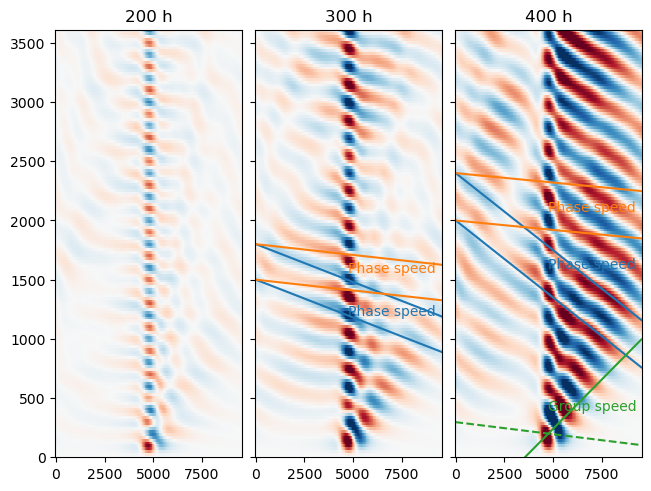

In [7]:
fig, axs = subplots_shared(1, 3)
for nn, T, lambm, lambp in zip([0, 1, 2], 
                               [200, 300, 400], 
                               [np.nan, -4696.2, -3076.6], 
                               [np.nan, -16493.37, -25176.22]):
    ax = axs[nn]
    with xr.open_dataset(f'Rossby{T}.snapshot.nc') as ds:
        ds = ds.isel(yt=65, yu=65, zt=-2, zw=-2)
        time = tohours(ds.Time)
        pcolormesh_sym(ds.xt, time, ds.v, vbound=0.002, ax=ax)
        ax.plot(ds.xt, ds.xt / lambm * T + 5*T, color='C0')
        ax.plot(ds.xt, ds.xt / lambm * T + 6*T, color='C0')
        if nn > 0:
            ax.text(ds.xt.mean(), 4*T, 'Phase speed', color='C0')
        ax.plot(ds.xt, ds.xt / lambp * T + 5*T, color='C1')
        ax.plot(ds.xt, ds.xt / lambp * T + 6*T, color='C1')
        if nn > 0:
            ax.text(ds.xt.mean(), 5.2*T, 'Phase speed', color='C1')
        if nn == 2:
            ax.plot(ds.xt, (ds.xt - ds.xt.mean())/ cgp / 3.6 + T / 2, color='C2', ls='--')
            ax.plot(ds.xt, (ds.xt - ds.xt.mean())/ cgm / 3.6 + T / 2, color='C2', label='Group speed')
            ax.text(ds.xt.mean(), T, 'Group speed', color='C2')
        ax.set_ylim(bottom=0)
        ax.set_title(f'{T} h')

The 400-h simulation is the most clear, with the best agreement between the forcing and the response.  Note that in these simulations, the forcing region is relatively small compared to the wavelengths, so the response is not always very good.  

To the east of the forcing, there is a strong response.  Note that the phase velocity is still to the left, but the response grows to the right.   There is a slower phase propagation to the left, but Rossby waves refelct off the wester boundary and interfere with the westward radiating signal.  

Note that there is a response in the 200-h forcing, and that it looks a lot like the 400-h forcing.  This is an example of frequency leakage, where the 200-h forcing is not a perfect sine wave, and hence leads to some lowere frequency forcing and generates weak Rossby waves at the 400-h period.  

### Q1.2.3 Group speed

Calculate the x-direction group speed for both sets of waves in the 400-h simulation and compare to the simulation's Hovmoller diagram (I did this by just adding to the Hovmoller diagram above and replotting it.

From 

$$ \omega = -\beta_0R^2 \frac{l}{1 + R^2l^2} $$ we can calculate 
$$c_{gx} = \frac{d\omega}{dl} = \frac{-\beta_0 R^2 + \beta_0 R^4 l^2}{(1 + R^2 l^2)^2}$$


In [8]:

cgp = beta * (-R**2 + R**4*lp**2)/(1+R**2*lp**2)**2
cgm = beta * (-R**2 + R**4*lm**2)/(1+R**2*lm**2)**2

print(f'Positive branch: wavelength = {2*np.pi/lp / 1000:1.2f} km, group speed = {cgp *3.6:1.2f} km/h ')
print(f'Negative branch: wavelength = {2*np.pi/lm / 1000:1.2f} km, group speed  = {cgm * 3.6:1.2f} km/h')
print(cgm)


Positive branch: wavelength = -25176.22 km, group speed = -49.23 km/h 
Negative branch: wavelength = -3076.58 km, group speed  = 6.02 km/h
1.6712038454938625


So we see that the shorter wavelenth has a group speed to the right at 6 km/h, whereas the longer wavelength has a group speed to the left at 49 km/h.  If we add these speeds to the plots above, then we get reasonable estimates for the speed at which _energy_ propagates across each basin..

### Q1.2.4 Compare dq/dt to q

For `Rossby400.py`, calculate the time derivative of the relative vorticity, and compare to the relative vorticity and argue if this make sense for the direction of propagation of the Rossby wave.  

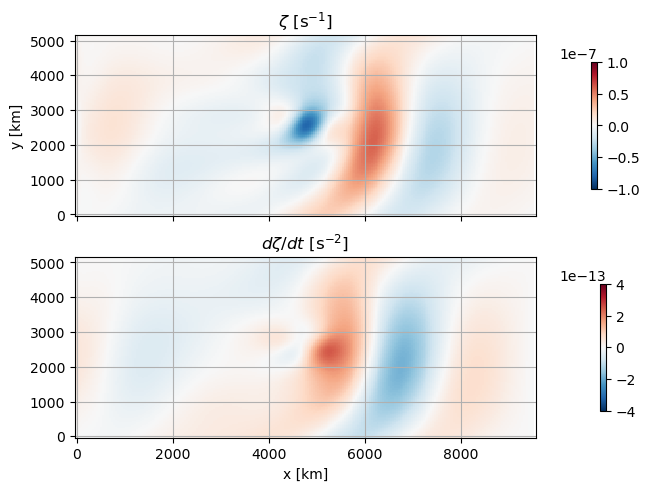

In [9]:
with xr.open_dataset('Rossby400.snapshot.nc') as ds:
    ds = ds.isel(Time=slice(30,32)).isel(zt=-1)

    # calculate the vorticity: dv/dx-du/dy:
    vort = ds.v.diff(dim='xu').values + ds.u.diff(dim='yu').values
    vort = vort / 40000
    dvort_dt = np.diff(vort, axis=0)[0] / 24 /3600

    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, layout='constrained')
        
    pc = ax[0].pcolormesh(ds.xt, ds.yt, vort[0], vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
    ax[0].grid('on')
    ax[0].set(title='$\zeta\ \mathrm{[s^{-1}]}$', ylabel='y [km]')
    fig.colorbar(pc, ax=ax[0], shrink=0.7)
    
    pc=ax[1].pcolormesh(ds.xt, ds.yt, dvort_dt, vmin=-4e-13, vmax=4e-13, cmap='RdBu_r')
    ax[1].grid('on')
    ax[1].set(title='$d\zeta/dt\ \mathrm{[s^{-2}]}$', xlabel='x [km]')
    fig.colorbar(pc, ax=ax[1], shrink=0.7)
    


We can see from this that the null in vorticity at x=7000 km has decreasing vorticity maximum.  So we expect the negative vorticity anomaly to move to the left.  

## Q2 Overturning Circulation: Qualitative

These simulations take a few hours to run on my machine, and I want you to look at a few, so I'll provide the netcdf files. The simulations are in [Overturning.py](Overturning.py), and then [Hosing.py](Hosing.py) and [StopHosing.py](StopHosing.py).  The files are provided in [OverturningRuns.zip](https://ocean-physics.seos.uvic.ca/~jklymak/Teaching/Eos431/OverturningRuns.zip) (Note 776 Mb!).

Physically, the models are solved on a spherical grid so the coordinates are in degrees longitude (`xt`, `xu`) and latitude (`yt`,`yu`).  The "wedge" is 48 degrees in longitude, and from the equator to 72 degrees N in latitude.  There are 18 vertical levels used for these simulations, with the vertical grid spacing between the levels exponentially growing from 113 m to 318 m at the seafloor.  

All the models use the same external forcing of a sin-wave temperature at the surface, going from 28 degrees at the equator to 4 degress at 72 degrees N.  

The models are run with isopycnal lateral diffusion in an attempt to reduce the "Veronis effect".  

### Q2.1 Plot the forcing

Plot the surface temperature for `OverturningBeta4e6Coarse.snapshot.nc`.  How close is it to the forcing described above?  

<xarray.Dataset>
Dimensions:            (xt: 12, xu: 12, yt: 18, yu: 18, zt: 18, zw: 18,
                        tensor1: 2, tensor2: 2, Time: 400)
Coordinates:
  * xt                 (xt) float64 -2.0 2.0 6.0 10.0 ... 30.0 34.0 38.0 42.0
  * xu                 (xu) float64 0.0 4.0 8.0 12.0 ... 32.0 36.0 40.0 44.0
  * yt                 (yt) float64 -2.0 2.0 6.0 10.0 ... 54.0 58.0 62.0 66.0
  * yu                 (yu) float64 0.0 4.0 8.0 12.0 ... 56.0 60.0 64.0 68.0
  * zt                 (zt) float64 -3.809e+03 -3.428e+03 ... -178.6 -47.76
  * zw                 (zw) float64 -3.619e+03 -3.264e+03 ... -113.2 0.0
  * tensor1            (tensor1) float64 0.0 1.0
  * tensor2            (tensor2) float64 0.0 1.0
  * Time               (Time) timedelta64[ns] 360 days ... -57768 days +02:58...
Data variables: (12/33)
    dxt                (xt) float64 ...
    dxu                (xu) float64 ...
    dyt                (yt) float64 ...
    dyu                (yu) float64 ...
    dzt                (zt) float64 ...
    dzw                (zw) float64 ...
    ...                 ...
    kappaM             (Time, zt, yt, xt) float64 ...
    kappaH             (Time, zw, yt, xt) float64 ...
    surface_taux       (Time, yt, xu) float64 ...
    surface_tauy       (Time, yu, xt) float64 ...
    forc_rho_surface   (Time, yt, xt) float64 ...
    psi                (Time, yt, xt) float64 ...
Attributes:
    date_created:       2023-09-07T15:42:47.965547
    veros_version:      1.5.0
    setup_identifier:   OverturningBeta10e5Coarse
    setup_description:  
    setup_settings:     {"identifier": "OverturningBeta10e5Coarse", "descript...
    setup_file:         /Users/jklymak/Dropbox/Teaching/Eos431Phy441/source/A...
    setup_code:         #!/usr/bin/env python\n\n"""\n"""\n\n__VEROS_VERSION_...

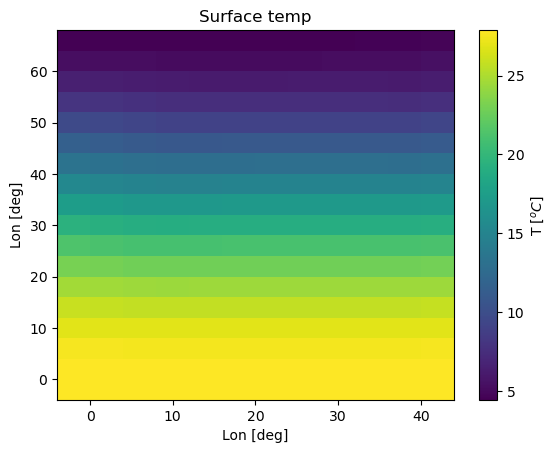

In [10]:
td = 'OverturningBeta10e5Coarse'
with xr.open_dataset(td+'.snapshot.nc') as ds:
    display(ds)
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(ds.xt, ds.yt, ds.temp.isel(zt=-1, Time=-1))
    fig.colorbar(pc, label='T $[^oC]$')
    ax.set_xlabel('Lon [deg]')
    ax.set_ylabel('Lon [deg]')
    ax.set_title('Surface temp')

The maximum temperature is very close to 28, and the minimum very close to 4 (though a bit warmer).  The temperature is quite consistent across the basin, though close inspection reveals some small deviations. 

### Q2.2 Overturning as a function of mixing strength

There are 6 runs, each run at a different value of a constant vertical mixing co-efficient.   


| $\kappa\ [m^2\,s^{-1}]$ | Runname |
|-------------------:|:-------------------------|
| $4\times10^{-6}$   | OverturningBeta4e6Coarse |
| $1 \times 10^{-5}$ | OverturningBeta1e5Coarse |
| $4\times 10^{-5}$  | OverturningBeta1e5Coarse |
| $8\times 10^{-5}$  | OverturningBeta8e5Coarse |
| $1\times 10^{-4}$  | OverturningBeta10e5Coarse|
| $4\times 10^{-4}$  | OverturningBeta4e4Coarse |

Plot the a cross-section at the end of the run from south to north with the mean north-south velocity and temprature contoured for at least three of these runs. Discuss the basic sense of the flow, and the differences observed as the mixing is increased.  

Text(0, 0.5, 'Depth [m]')

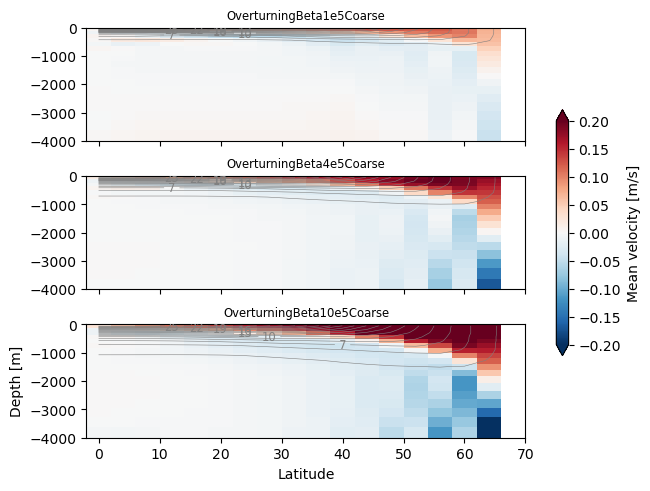

In [11]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, sharey=True)
for nn, td in enumerate(['OverturningBeta1e5Coarse', 'OverturningBeta4e5Coarse', 'OverturningBeta10e5Coarse']):
    with xr.open_dataset(td+'.snapshot.nc') as ds:
        ax = axs[nn]
        levels = np.arange(4.01, 30, 1)
        pc = ax.pcolormesh(ds.yu, ds.zt, ds.isel(Time=-1).v.integrate(coord='xt'), vmin=-2e-1, vmax=2e-1, cmap='RdBu_r')
        cl = ax.contour(ds.yu, ds.zt, ds.isel(Time=-1).temp.mean(dim='xt'), levels=levels, 
                        linewidths=0.4, colors='0.5')
        ax.clabel(cl, levels[::3], fontsize='small')
        ax.set_title(td, fontsize='small')
        ax.set_ylim(-4000, 0)
fig.colorbar(pc, ax=axs, shrink=0.6, extend='both', label='Mean velocity [m/s]')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth [m]')


Text(0, 0.5, 'Depth [m]')

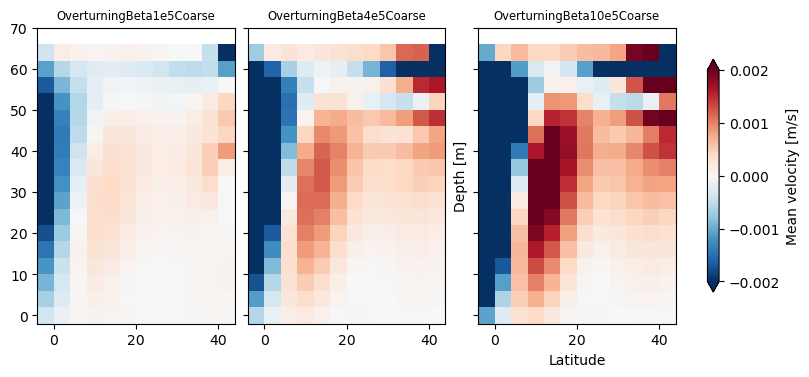

In [12]:
fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(8,4))
for nn, td in enumerate(['OverturningBeta1e5Coarse', 'OverturningBeta4e5Coarse', 'OverturningBeta10e5Coarse']):
    with xr.open_dataset(td+'.snapshot.nc') as ds:
        ds = ds.isel(Time=-1).sel(zt=-2000, method='nearest')
        ax = axs[nn]
        levels = np.arange(4.01, 30, 1)
        pc = ax.pcolormesh(ds.xt, ds.yu, ds.v, vmin=-2e-3, vmax=2e-3, cmap='RdBu_r')
        ax.clabel(cl, levels[::3], fontsize='small')
        ax.set_title(td, fontsize='small')
        ax.set_aspect(1)
        #ax.set_ylim(-4000, 0)
fig.colorbar(pc, ax=axs, shrink=0.6, extend='both', label='Mean velocity [m/s]')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth [m]')


So, in general there is a poleward flow at the surface as warm water moves north to replace sinking cold water.  There is a weaker return flow at depth to balance it.  

As the mixing gets stronger the lateral gradients increase, and the warm water is mixed deeper.  This drives a stronger overturning strength. 

### Q2.3 Overturning as function of time

We can calculate the strength of the overturning circulation ourselves. However, this is done so often in physical oceanography that many models have an overturning diagnostic.  

Using the files like `OverturningBeta4e6Coarse.overturning.nc`, plot the _minimum_ of the overturning strength _south_ of 60 N (the reuslts are less clear north of 60 N) as a function of time.  The correct field in these files to look at is `vsf_depth`.  

How long do these runs take to reach "steady state"?  Which runs are the fastest to get to "steady state"? 

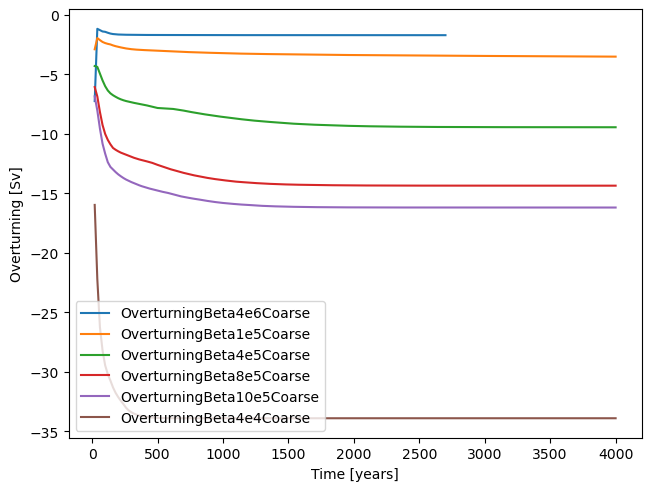

In [13]:
fig, ax = plt.subplots(1, layout='constrained', sharex=True, sharey=True)
for nn, td in enumerate([ 'OverturningBeta4e6Coarse', 'OverturningBeta1e5Coarse', 
                         'OverturningBeta4e5Coarse', 'OverturningBeta8e5Coarse',
                         'OverturningBeta10e5Coarse', 'OverturningBeta4e4Coarse', ]):
    with xr.open_dataset(td+'.overturning.nc', decode_timedelta=False) as ds:
        #display(ds)
        ds['Time'] = ds.Time / 360. # model years
        ds['vsf_depth'] = ds.vsf_depth / 1e6
        ds.vsf_depth.sel(yu=slice(20, 60)).min(dim=("yu", "zw")).plot(x='Time', ax=ax, label=td)
        ax.set_ylabel('Overturning [Sv]')
        ax.set_xlabel('Time [years]')
ax.legend()

The weaker mixing runs take longer to reach steady state, on the order of 1500 years.  

### Q2.4 Hosing experiment and stop...

Thre more runs were made, based on `OverturningBeta4e5Coarse`.  The first was `Hosing`, which adds fresh water north of 50 N.  This is supposed to be like glaciers and sea ice melting.  The rate was approximately 0.1 Sv of fresh water added to the upper ocean.  

The next two were `StopHosing` and `StopHosing3`.  These stop the fresh water flux (all the glaciers have melted.  The first stops after 100 years, and the second stops after 300 years.  

As above, plot a time series of the strength of the overturning circulation for all 4 of these runs versus time.  I found it really useful to _also_ plot the difference between the minimum and maximum salinities in the model.

Describe what happens to the overturning circulation in the three new runs.

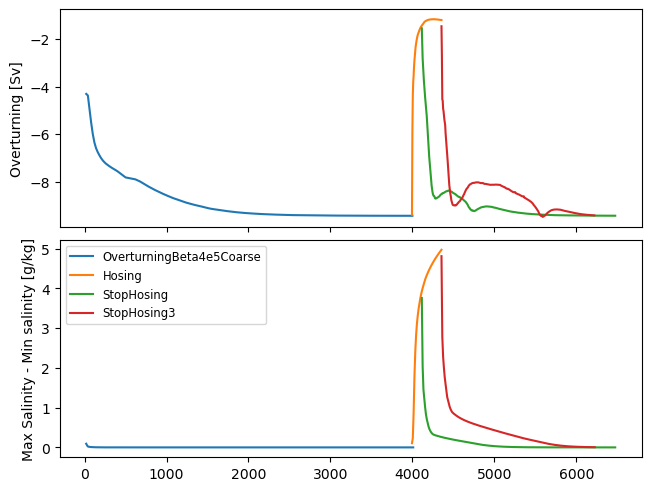

In [14]:
fig, axs = plt.subplots(2, 1, layout='constrained', sharex=True, sharey=False)
for nn, td in enumerate(['OverturningBeta4e5Coarse', 'Hosing', 'StopHosing', 'StopHosing3']):
    with xr.open_dataset(td+'.overturning.nc', decode_timedelta=False) as ds, xr.open_dataset(td+'.snapshot.nc', decode_timedelta=False) as ds0:
        ds['Time'] = ds.Time / 360. # model years
        ds0['Time'] = np.arange(0, len(ds0.Time)*10, 10) 
        ds0['Time'] = ds0['Time'] + ds['Time'][0]
        ds0 = ds0.isel(xt=4, xu=4)
        ds['vsf_depth'] = ds.vsf_depth / 1e6
        ds.vsf_depth.sel(yu=slice(20, 60), zw=slice(None, -100)).min(dim=("yu", "zw")).plot(x='Time', ax=axs[0], label=td)
        axs[0].set_ylabel('Overturning [Sv]')
        axs[0].set_xlabel('')
        
        dS = (ds0.salt.sel(yt=slice(20, 60)).max(dim=("yt", "zt")) - 
        ds0.salt.sel(yt=slice(20, 60)).min(dim=("yt", "zt")))
        axs[1].plot(dS.Time, dS, label=td)
        axs[1].set_ylabel('Max Salinity - Min salinity [g/kg]')
        axs[1].set_title('')
        ax.set_xlabel('Time [years]')
axs[1].legend(fontsize='small')

As the fresh water is added to the model, the overturning circulation rapidly stops; within 10 years or so.  When the fresh water forcing is stopped, the overturning circulation recovers, but takes longer when more fresh water is added.   

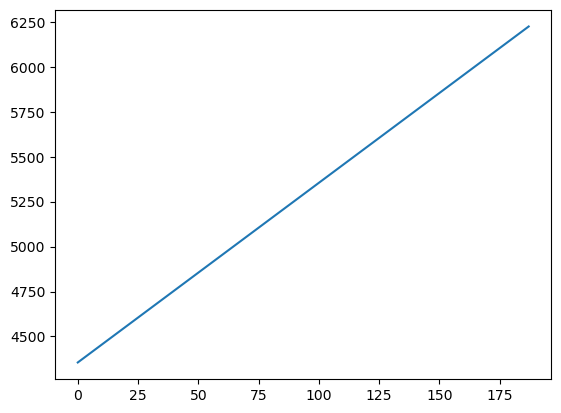

In [15]:
fig, ax = plt.subplots()
dt = np.diff(ds0.Time)
#ax.hist(dt, np.arange(-100.05, 100, 0.1))
ax.plot(ds0.Time)